# 배깅bagging (boostrap aggregating)
#### <img src='../img/bagging.png' width='85%'>
- 보통 구축한 트리에는 랜덤성이 없는데 랜덤한 데이터를 이용해서 트리를 구성하는 방법은?
- 훈련 데이터셋에서 중복을 허용하여 무작위 추출sampling하는 방식 => 배깅

- 통계학에서 샘플데이터의 수가 적거나 샘플이 치우쳐 있는 경우에는 과적합의 문제 발생

- 머신러닝의 경우에도 학습데이터의 양이 작거나 너무 학습데이터에 특화해서 학습하게 되면 학습데이터에 대해 좋은 결과를 내지만 실제 데이터에서는 성능이 좋지 않게 나올수 있음(과적합)

# 부트스트래핑boostraing
전체 모집단의 분포를 확실하게 알 수 없는 경우에 표본을 취한후 그 표본이 전체 집단을 대표한다는 가정하에 전체 분포를 유추하는 방법
- 이때 표본으로부터 많은 횟수에 걸쳐 샘플을 복원추출한 후 각 샘플에 대한 분포를 구함 
- 이를 통해 전체의 분포를 유추

- 실제로 머신러닝에 많이 사용되는 방식
    - 회귀: 평균을 취해 분산을 줄이는 방식을 사용
    - 분류: 투표를 통해 빈도값이 높은 것을 취하는 방식 사용

- 베깅을 사용하면 안되는 경우
    - 표본 데이터가 작은 경우   : 전체를 반영 못함
    - 데이터에 잡음이 많은 경우 : 왜곡된 결과 나올 가능성 존재
    - 데이터에 의존성이 있는 경우 : 다중공선성-독립적이어야 함

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

In [4]:
from sklearn.ensemble import BaggingClassifier

In [5]:
import warnings
warnings.simplefilter(action='ignore')

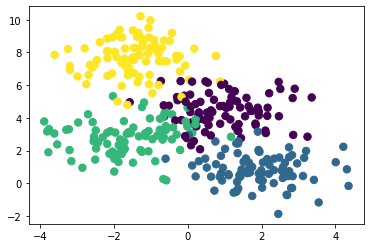

In [6]:
# 테스트용 데이터 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

# 데이터 분할
x_train, x_test, y_train, y_test = \
    train_test_split(X, y,
                     random_state=2209021005)

# 배깅 분류 시행

In [7]:
# n_estimators : 모형 갯수 지정
# bootstrap : 부트스트랩(샘플추출시 중복허용) 여부
# n_jobs : 다중작업수 지정
# oob_score : 베깅 평가지수 사용여부

bagclf = BaggingClassifier(DecisionTreeClassifier(), 
                 n_estimators=500, bootstrap=True,
                 n_jobs=-1, oob_score=True)

bagclf.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

# oob_score : out-of-bag score
- oob는 ``부트스트래핑 샘플링시 선택되지 않은 표본`` 을 의미
- 기본적으로 중복을 허용하여 훈련데이터 크기만큼 n개(70%)의 샘플을 추출하면 나머지(30%)는 oob 샘플로 남음
- 매번 예측할때 마다 남겨진 oob샘플은 다를것임
- 따라서, 예측시 검증 데이터를 사용하지 않고, ``oob 샘플을 이용해서 평가`` 시행
- 해당 평가점수는 oob_score에 저장

In [8]:
bagclf.oob_score_

0.9198473282442748

In [9]:
pred = bagclf.predict(x_test)
accuracy_score(y_test, pred)

0.8636363636363636

<AxesSubplot:>

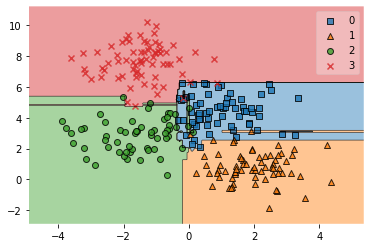

In [10]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, bagclf)

## 중복허용없이 무작위 추출후 분석


In [11]:
# n_estimators : 모형 갯수 지정
# bootstrap : 부트스트랩(샘플추출시 중복허용) 여부
# n_jobs : 다중작업수 지정
# oob_score : 베깅 평가지수 사용여부

bagclf = BaggingClassifier(DecisionTreeClassifier(), 
                 n_estimators=500,
                 n_jobs=-1, oob_score=False)

bagclf.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1)

In [12]:
bagclf.score(x_train, y_train)

1.0

In [13]:
pred = bagclf.predict(x_test)
accuracy_score(y_test, pred)

0.8522727272727273

<AxesSubplot:>

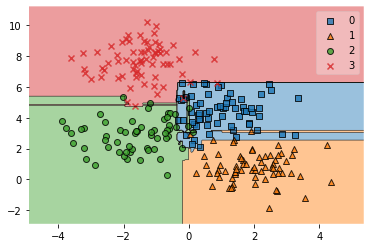

In [16]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, bagclf)